# Unsupervised learning with Clustering

## Clustering:-
Cluster analysis or clustering is the most commonly used technique in unsupervised learning. It is used to find data clusters such that each cluster have most closely matched data.

## Clustering Algorithm:-
1. Prototype-based Clustering 
1. Heirarchical Clustering
1. Desity-Based Clustering

### * Prototype-Based Clustering 
Prototype-based clustering assumes that most data is located near prototypes. 
Example- Centroids (average) or medoids (most frequently occuring points) , K means , a Prototype based method, is most popular clustering method which involves 
* Training data that gets assigned to matching cluster based on similarity
* the iterative process to get data points in best cluster possible

***K-Means Clustering Example***
Problem Statement :- In california , the govt tries to identify high density cluster to build hospitals (no other ground truth or features is provided apart from the population data). How can the clusters be identified ?

* **Step1 :-**
Randomly pick K centroids. Start by picking k centroids , Let's assume k = 3\
Find the number of clusters , by using elbow method 

* **Step2 :-**
Assign each point to the nearest centeroid $$ M(J) , J \in {1 \cdots k} $$

The points are assigned such that the euclidean distance of each point from respective centroids should be minimum.

* **Step3 :-**
Move each `Centroid` to the center of the respective cluster.

* **Step4 :-**
Calculate distance of the centroid from each point again.\
Calculate Euclidean distance between each point and centroids.

* **Step5 :-**
Move points across cluster and recalulate the distance from the centroid.

* **Step6 :-**
Keep moving points across cluster untill the Euclidean distance is minimized.


Repeat the steps untill within the cluster the `Euclidean distance` is minimized for each cluster.

### Mathematical Angle

* A key challenge in clustering is that you have to preset the number of clusters. This influences the quality of clusters.

* Unlike `Supervised learning` here one doesn't have ground truth lables. Hence , to check the quality of the clustering ,one should to use intrinsic methods , such as with-in clustering SSE , also called as `Distortion`.

* In sklearn ML library , this value is available via the inertia_ attribute , after fitting the `K Means Clusttering` model.

* One should plot the distortion agains the number of the clusters k. Intutively , Number of k increases ,distortion decreases.\
This is because the samples will be close to their assigned centroids.

* This plot is called elbow method. It indicates optimum number of clusters at the position of elbow , the point at which distortion starts to increase rapidly.

* The adjoining cluster indicates the K=3 is suitable for the clustering.

* K means is based on finding points close to cluster centroids. The distance between two points X and Y is measured by using squared Euclidean Distance between them in an m-dimentional space.

* Here , J refers to the Jth dimension (or Jth feature) of the data point.

$$ d(x,y)^2 = \sum_{j=1}^m(x_j - y_j)^2 = ||x-y||_2^2 $$

* Based on this , the optimization problem is to minimize the within-cluster `sum of squared errors (SSE)` which is sometimes called `cluster inertia`.

    * Here j refers to the Jth cluster. mu of (j) is the centroid of that cluster.
    * w(i,j) = 1 if the sample x (i) is in cluster j, and 0 otherwise.
    
    $$ SSE = \sum_{i=1}^n\sum_{j=1}^k w^{(i,j)} ||x^{(i)} - \mu^{(j)}||_2^2 $$

In [24]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter

In [6]:
link = '/home/rahul/my_project_dir/python_learning/Class/Datasets/Customers.csv'
df = pd.read_csv(link)
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

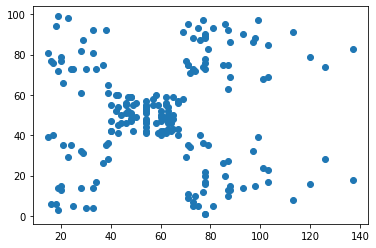

In [8]:
# Let's check how many clusters we can form 
# we simply use scatterplot to see this
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

In [10]:
cVar = df[['Annual Income (k$)','Spending Score (1-100)' ]]
cVar.sample(6)

Annual Income (k$)  Spending Score (1-100)
70                   49                      55
119                  67                      57
166                  86                      20
67                   48                      48
150                  78                      17
40                   38                      35

In [11]:
# To find max number of cluster we use Elbow Method
wcss = []
for i in range(1,10):
    cluster = KMeans(i)
    cluster.fit(cVar)
    wcss.append(cluster.inertia_)
    
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30552.71402546729,
 26155.582930794695,
 22209.851608025543]

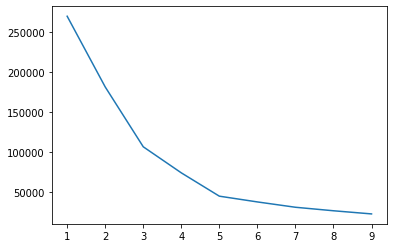

In [13]:
# Let's plot elbow method
plt.plot(range(1,10) , wcss)
plt.show()

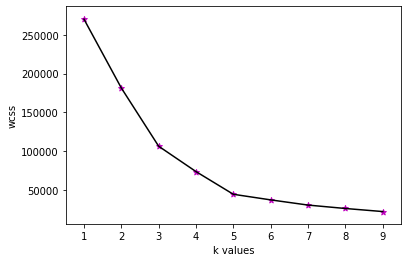

In [17]:
# Let's compare the elbow method
plt.plot(range(1,10) , wcss,'k')
plt.scatter(range(1,10), wcss , marker= '*' ,color='m')
plt.xlabel('k values')
plt.ylabel('wcss')
plt.show()

In [18]:
# now we can cluster easily by k = 5
km = KMeans(n_clusters=5 , random_state=5)
km.fit_predict(cVar)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [19]:
cVar['Cluster'] = km.predict(cVar)

/home/rahul/my_project_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
cVar

Annual Income (k$)  Spending Score (1-100)  Cluster
0                    15                      39        4
1                    15                      81        3
2                    16                       6        4
3                    16                      77        3
4                    17                      40        4
..                  ...                     ...      ...
195                 120                      79        1
196                 126                      28        2
197                 126                      74        1
198                 137                      18        2
199                 137                      83        1

[200 rows x 3 columns]

In [21]:
# unique values of cluster
cVar.Cluster.unique()

array([4, 3, 0, 1, 2], dtype=int32)

In [23]:
c1 = cVar[cVar['Cluster'] == 0]
c2 = cVar[cVar['Cluster'] == 1]
c3 = cVar[cVar['Cluster'] == 2]
c4 = cVar[cVar['Cluster'] == 3]
c5 = cVar[cVar['Cluster'] == 4]

In [28]:
print(Counter(c1.Cluster))
print(Counter(c2.Cluster))
print(Counter(c3.Cluster))
print(Counter(c4.Cluster))
print(Counter(c5.Cluster))

Counter({0: 81})
Counter({1: 39})
Counter({2: 35})
Counter({3: 22})
Counter({4: 23})


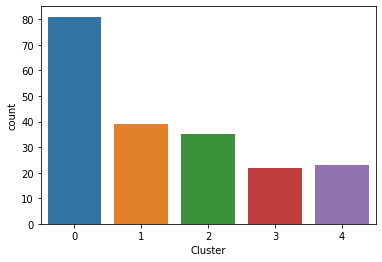

In [29]:
sns.countplot(cVar.Cluster)

In [30]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [31]:
c1.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster'], dtype='object')

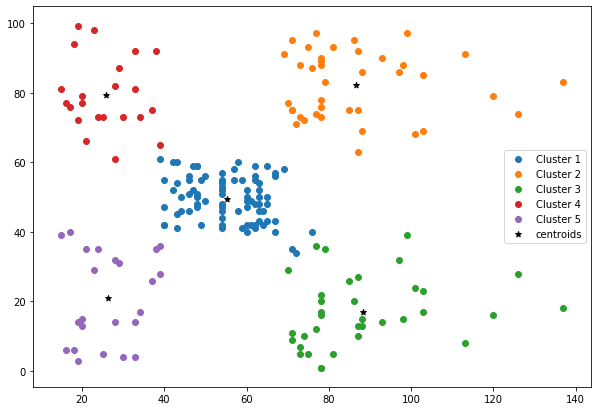

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(c1['Annual Income (k$)'],c1['Spending Score (1-100)'] , label = 'Cluster 1')
plt.scatter(c2['Annual Income (k$)'],c2['Spending Score (1-100)'] , label = 'Cluster 2')
plt.scatter(c3['Annual Income (k$)'],c3['Spending Score (1-100)'] , label = 'Cluster 3')
plt.scatter(c4['Annual Income (k$)'],c4['Spending Score (1-100)'] , label = 'Cluster 4')
plt.scatter(c5['Annual Income (k$)'],c5['Spending Score (1-100)'] , label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1] , marker='*' , color= 'k' , label ='centroids')
plt.legend()
plt.show()